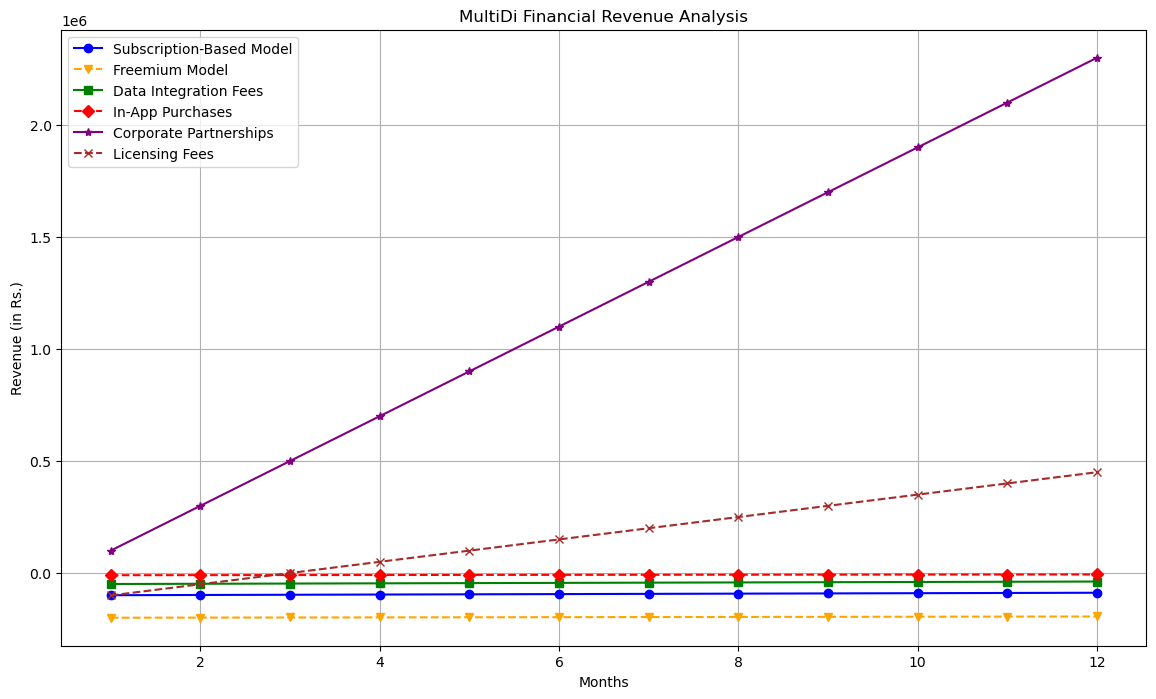

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for each model

# Subscription-Based Model
m_subscription = 1000
c_subscription = 100000

# Freemium Model
p_freemium = 500
c_freemium = 200000

# Data Integration Fees
d_integration = 1000
c_integration = 50000

# In-App Purchases
pi_in_app = 300
c_in_app = 10000

# Corporate Partnerships
f_corporate = 200000
c_corporate = 100000

# Licensing Fees
l_licensing = 50000
c_licensing = 150000

# Define a range for x(t) - let's assume x(t) represents time in months
months = np.arange(1, 13)

# Calculate revenue for each model
y_subscription = m_subscription * months - c_subscription
y_freemium = p_freemium * months - c_freemium
y_integration = d_integration * months - c_integration
y_in_app = pi_in_app * months - c_in_app
y_corporate = f_corporate * months - c_corporate
y_licensing = l_licensing * months - c_licensing

# Plotting the results
plt.figure(figsize=(14, 8))

plt.plot(months, y_subscription, label='Subscription-Based Model', color='blue', linestyle='-', marker='o')
plt.plot(months, y_freemium, label='Freemium Model', color='orange', linestyle='--', marker='v')
plt.plot(months, y_integration, label='Data Integration Fees', color='green', linestyle='-', marker='s')
plt.plot(months, y_in_app, label='In-App Purchases', color='red', linestyle='--', marker='D')
plt.plot(months, y_corporate, label='Corporate Partnerships', color='purple', linestyle='-', marker='*')
plt.plot(months, y_licensing, label='Licensing Fees', color='brown', linestyle='--', marker='x')

# Adding titles and labels
plt.title('MultiDi Financial Revenue Analysis')
plt.xlabel('Months')
plt.ylabel('Revenue (in Rs.)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [2]:
pip install dash plotly

Note: you may need to restart the kernel to use updated packages.


In [26]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the parameters for each model
P_subscription = 1000
C_fixed_subscription = 100000

P_freemium = 500
C_fixed_freemium = 200000

D_integration = 1000
C_fixed_integration = 50000

P_in_app = 300
C_fixed_in_app = 10000

F_corporate = 200000
C_fixed_corporate = 100000

L_licensing = 50000
C_fixed_licensing = 150000

# Generate time range (e.g., months)
months = np.arange(1, 13)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("MultiDi Financial Analysis Dashboard", style={'text-align': 'center'}),
    
    dcc.Graph(id='financial-graph'),
    
    html.Label('Number of Subscriptions (for relevant models):'),
    dcc.Slider(
        id='subscription-slider',
        min=0,
        max=1000,
        step=50,
        marks={i: str(i) for i in range(0, 1001, 100)},
        value=500
    ),
    
    html.Div(id='summary-stats', style={'margin-top': '20px'}),
    
    html.Hr(),
    
    dcc.Graph(id='combined-revenue-graph')
])

# Update the financial graph based on slider input
@app.callback(
    Output('financial-graph', 'figure'),
    [Input('subscription-slider', 'value')]
)
def update_graph(subscriptions):
    # Calculate financial metrics for each model based on the current number of subscriptions
    y_subscription = P_subscription * subscriptions * months - C_fixed_subscription
    y_freemium = P_freemium * subscriptions * months - C_fixed_freemium
    y_integration = D_integration * subscriptions * months - C_fixed_integration
    y_in_app = P_in_app * subscriptions * months - C_fixed_in_app
    y_corporate = F_corporate * subscriptions * months - C_fixed_corporate
    y_licensing = L_licensing * subscriptions * months - C_fixed_licensing
    
    # Create the plotly figure
    fig = go.Figure()

    # Add traces for each model
    fig.add_trace(go.Scatter(x=months, y=y_subscription, mode='lines+markers', name='Subscription-Based Model', line=dict(color='dodgerblue')))
    fig.add_trace(go.Scatter(x=months, y=y_freemium, mode='lines+markers', name='Freemium Model', line=dict(color='orange')))
    fig.add_trace(go.Scatter(x=months, y=y_integration, mode='lines+markers', name='Data Integration Fees', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=months, y=y_in_app, mode='lines+markers', name='In-App Purchases', line=dict(color='red')))
    fig.add_trace(go.Scatter(x=months, y=y_corporate, mode='lines+markers', name='Corporate Partnerships', line=dict(color='purple')))
    fig.add_trace(go.Scatter(x=months, y=y_licensing, mode='lines+markers', name='Licensing Fees', line=dict(color='brown')))

    fig.update_layout(title="Revenue vs. Time (Months)", xaxis_title="Time (Months)", yaxis_title="Revenue (Rs.)", legend=dict(x=0, y=1))
    
    return fig

# Update the summary statistics based on slider input
@app.callback(
    Output('summary-stats', 'children'),
    [Input('subscription-slider', 'value')]
)
def update_summary_stats(subscriptions):
    # Calculate current financial metrics
    y_subscription = P_subscription * subscriptions - C_fixed_subscription
    y_freemium = P_freemium * subscriptions - C_fixed_freemium
    y_integration = D_integration * subscriptions - C_fixed_integration
    y_in_app = P_in_app * subscriptions - C_fixed_in_app
    y_corporate = F_corporate * subscriptions - C_fixed_corporate
    y_licensing = L_licensing * subscriptions - C_fixed_licensing
    
    # Calculate total revenue
    total_revenue = y_subscription + y_freemium + y_integration + y_in_app + y_corporate + y_licensing
    
    return html.Div([
        html.H4(f"Summary for {subscriptions} Subscriptions:"),
        html.P(f"Subscription-Based Revenue: Rs. {y_subscription}"),
        html.P(f"Freemium Revenue: Rs. {y_freemium}"),
        html.P(f"Data Integration Revenue: Rs. {y_integration}"),
        html.P(f"In-App Purchase Revenue: Rs. {y_in_app}"),
        html.P(f"Corporate Partnership Revenue: Rs. {y_corporate}"),
        html.P(f"Licensing Fees Revenue: Rs. {y_licensing}"),
        html.Hr(),
        html.H4(f"Total Combined Revenue: Rs. {total_revenue}")
    ])

# Combined revenue graph
@app.callback(
    Output('combined-revenue-graph', 'figure'),
    [Input('subscription-slider', 'value')]
)
def update_combined_graph(subscriptions):
    # Calculate financial metrics for each model
    y_subscription = P_subscription * subscriptions * months - C_fixed_subscription
    y_freemium = P_freemium * subscriptions * months - C_fixed_freemium
    y_integration = D_integration * subscriptions * months - C_fixed_integration
    y_in_app = P_in_app * subscriptions * months - C_fixed_in_app
    y_corporate = F_corporate * subscriptions * months - C_fixed_corporate
    y_licensing = L_licensing * subscriptions * months - C_fixed_licensing

    # Calculate total combined revenue
    total_revenue = y_subscription + y_freemium + y_integration + y_in_app + y_corporate + y_licensing

    # Create the plotly figure
    fig = go.Figure()

    # Add trace for combined revenue
    fig.add_trace(go.Scatter(x=months, y=total_revenue, mode='lines+markers', name='Total Combined Revenue', line=dict(color='darkblue', width=4)))

    fig.update_layout(title="Total Combined Revenue vs. Time (Months)", xaxis_title="Time (Months)", yaxis_title="Revenue (Rs.)", legend=dict(x=0, y=1))
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


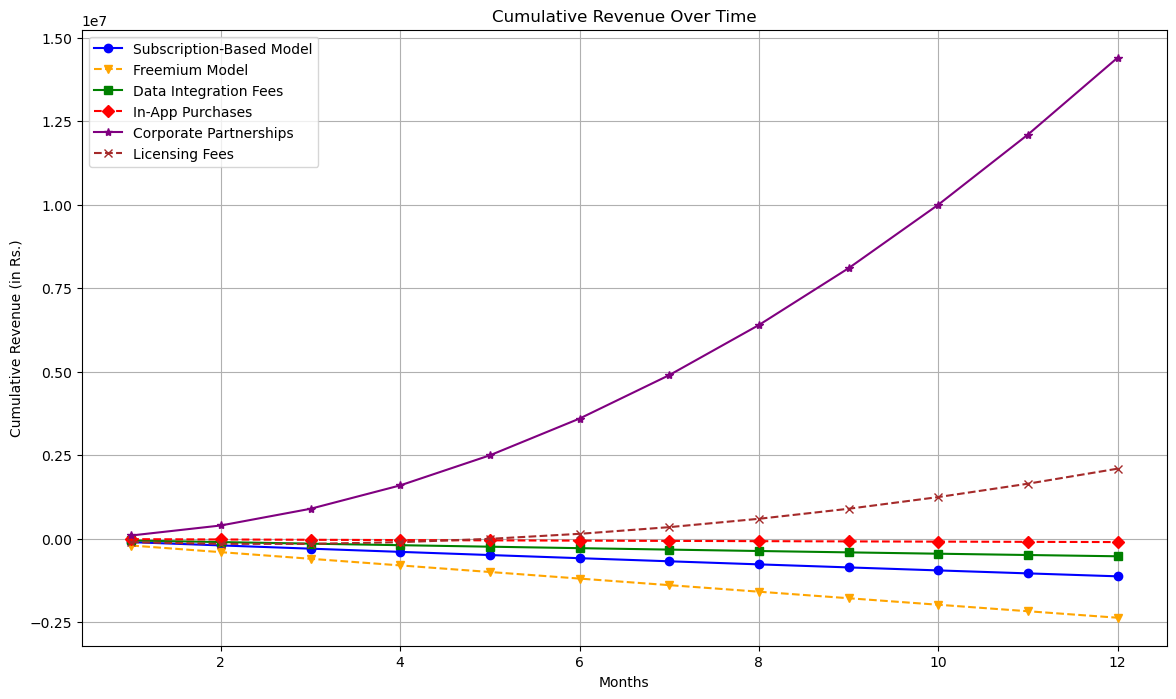

In [5]:
# Cumulative Revenue Calculation
cumulative_subscription = np.cumsum(y_subscription)
cumulative_freemium = np.cumsum(y_freemium)
cumulative_integration = np.cumsum(y_integration)
cumulative_in_app = np.cumsum(y_in_app)
cumulative_corporate = np.cumsum(y_corporate)
cumulative_licensing = np.cumsum(y_licensing)

# Plotting the Cumulative Revenue
plt.figure(figsize=(14, 8))

plt.plot(months, cumulative_subscription, label='Subscription-Based Model', color='blue', linestyle='-', marker='o')
plt.plot(months, cumulative_freemium, label='Freemium Model', color='orange', linestyle='--', marker='v')
plt.plot(months, cumulative_integration, label='Data Integration Fees', color='green', linestyle='-', marker='s')
plt.plot(months, cumulative_in_app, label='In-App Purchases', color='red', linestyle='--', marker='D')
plt.plot(months, cumulative_corporate, label='Corporate Partnerships', color='purple', linestyle='-', marker='*')
plt.plot(months, cumulative_licensing, label='Licensing Fees', color='brown', linestyle='--', marker='x')

# Adding titles and labels
plt.title('Cumulative Revenue Over Time')
plt.xlabel('Months')
plt.ylabel('Cumulative Revenue (in Rs.)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


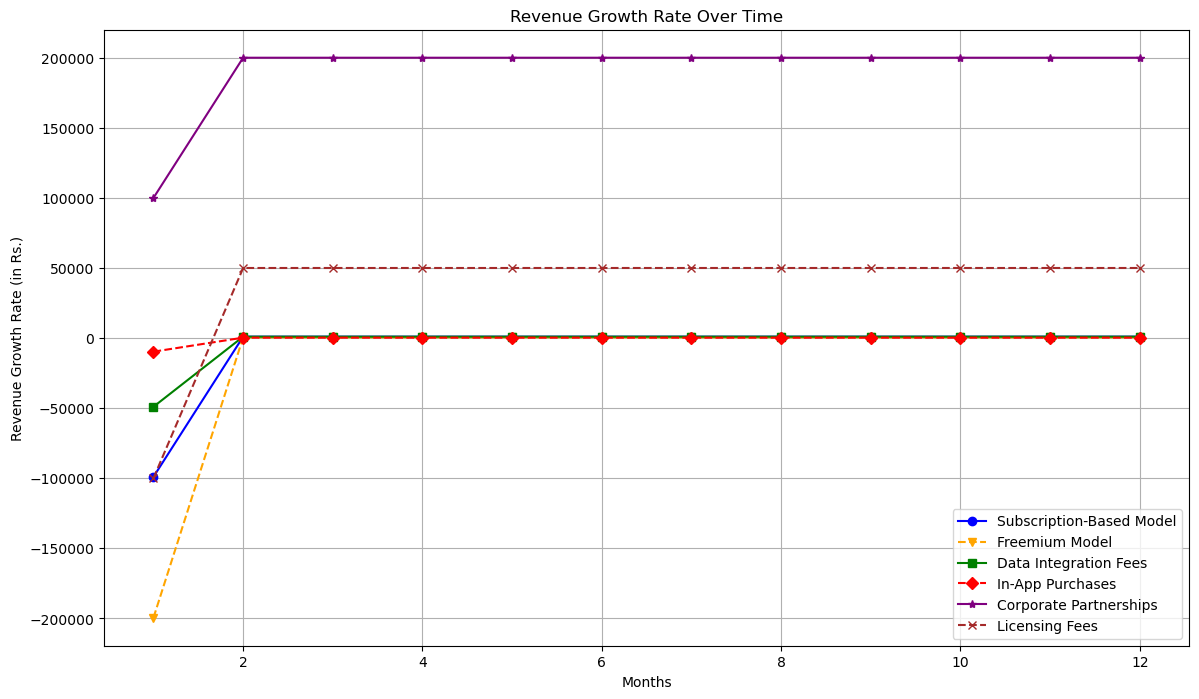

In [6]:
# Revenue Growth Rate Calculation
growth_subscription = np.diff(y_subscription, prepend=0)
growth_freemium = np.diff(y_freemium, prepend=0)
growth_integration = np.diff(y_integration, prepend=0)
growth_in_app = np.diff(y_in_app, prepend=0)
growth_corporate = np.diff(y_corporate, prepend=0)
growth_licensing = np.diff(y_licensing, prepend=0)

# Plotting the Revenue Growth Rate
plt.figure(figsize=(14, 8))

plt.plot(months, growth_subscription, label='Subscription-Based Model', color='blue', linestyle='-', marker='o')
plt.plot(months, growth_freemium, label='Freemium Model', color='orange', linestyle='--', marker='v')
plt.plot(months, growth_integration, label='Data Integration Fees', color='green', linestyle='-', marker='s')
plt.plot(months, growth_in_app, label='In-App Purchases', color='red', linestyle='--', marker='D')
plt.plot(months, growth_corporate, label='Corporate Partnerships', color='purple', linestyle='-', marker='*')
plt.plot(months, growth_licensing, label='Licensing Fees', color='brown', linestyle='--', marker='x')

# Adding titles and labels
plt.title('Revenue Growth Rate Over Time')
plt.xlabel('Months')
plt.ylabel('Revenue Growth Rate (in Rs.)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


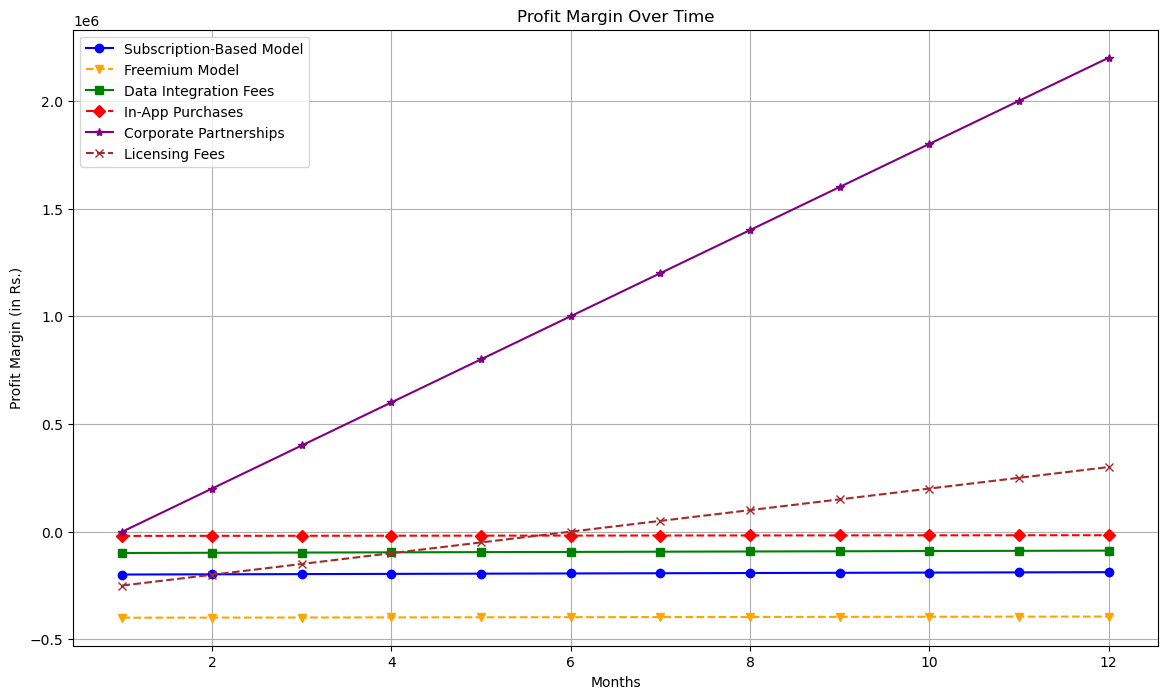

In [7]:
# Profit Margin Calculation
profit_subscription = y_subscription - c_subscription
profit_freemium = y_freemium - c_freemium
profit_integration = y_integration - c_integration
profit_in_app = y_in_app - c_in_app
profit_corporate = y_corporate - c_corporate
profit_licensing = y_licensing - c_licensing

# Plotting the Profit Margin
plt.figure(figsize=(14, 8))

plt.plot(months, profit_subscription, label='Subscription-Based Model', color='blue', linestyle='-', marker='o')
plt.plot(months, profit_freemium, label='Freemium Model', color='orange', linestyle='--', marker='v')
plt.plot(months, profit_integration, label='Data Integration Fees', color='green', linestyle='-', marker='s')
plt.plot(months, profit_in_app, label='In-App Purchases', color='red', linestyle='--', marker='D')
plt.plot(months, profit_corporate, label='Corporate Partnerships', color='purple', linestyle='-', marker='*')
plt.plot(months, profit_licensing, label='Licensing Fees', color='brown', linestyle='--', marker='x')

# Adding titles and labels
plt.title('Profit Margin Over Time')
plt.xlabel('Months')
plt.ylabel('Profit Margin (in Rs.)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


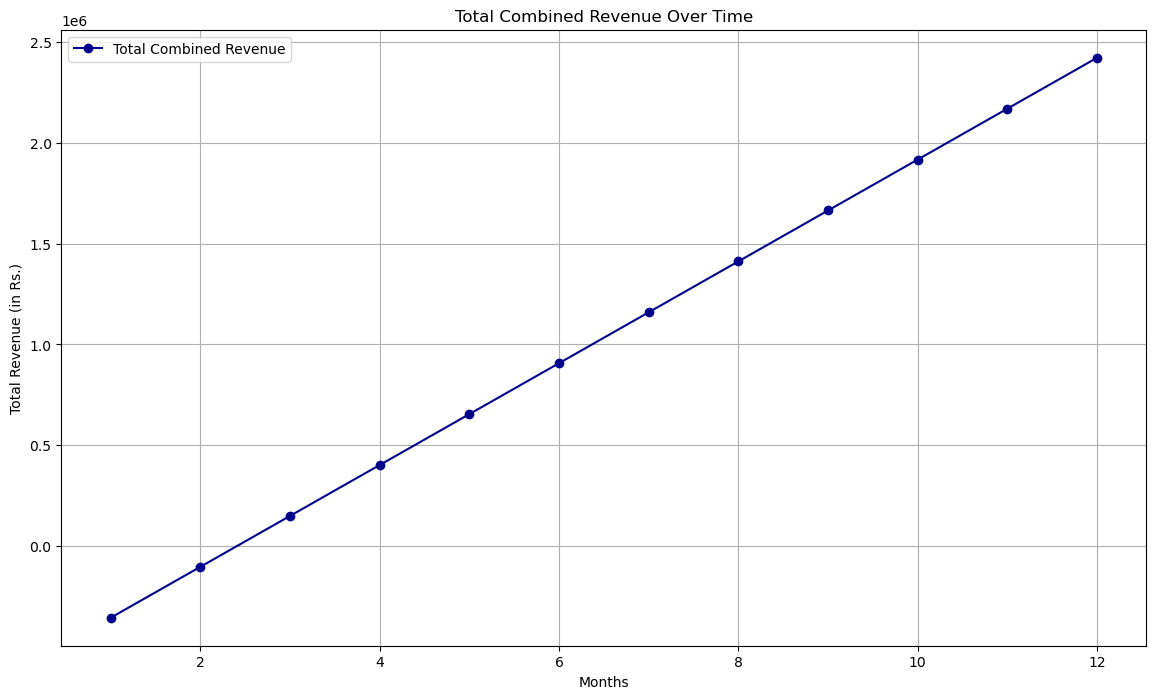

In [8]:
# Combined Revenue Calculation
total_revenue = y_subscription + y_freemium + y_integration + y_in_app + y_corporate + y_licensing

# Plotting the Combined Revenue
plt.figure(figsize=(14, 8))

plt.plot(months, total_revenue, label='Total Combined Revenue', color='darkblue', linestyle='-', marker='o')

# Adding titles and labels
plt.title('Total Combined Revenue Over Time')
plt.xlabel('Months')
plt.ylabel('Total Revenue (in Rs.)')

# Adding grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

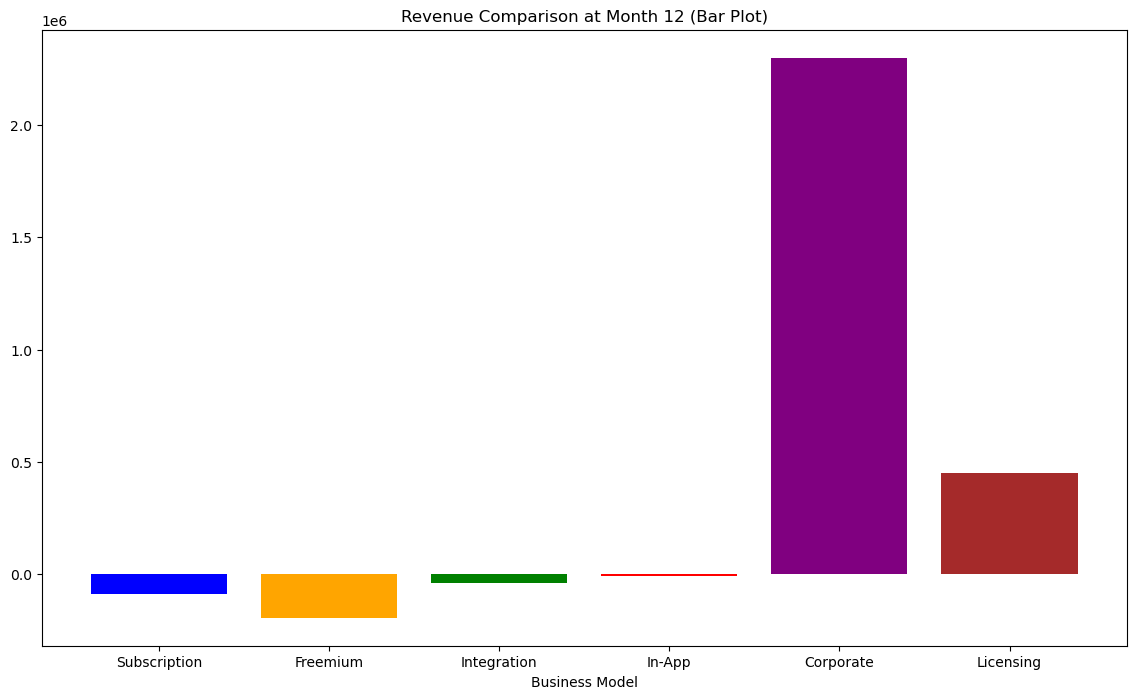

In [20]:
plt.figure(figsize=(14, 8))
models = ['Subscription', 'Freemium', 'Integration', 'In-App', 'Corporate', 'Licensing']
revenues = [y_subscription[-1], y_freemium[-1], y_integration[-1], y_in_app[-1], y_corporate[-1], y_licensing[-1]]
plt.bar(models, revenues, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Revenue Comparison at Month 12 (Bar Plot)')
plt.xlabel('Business Model')
plt.ylabel


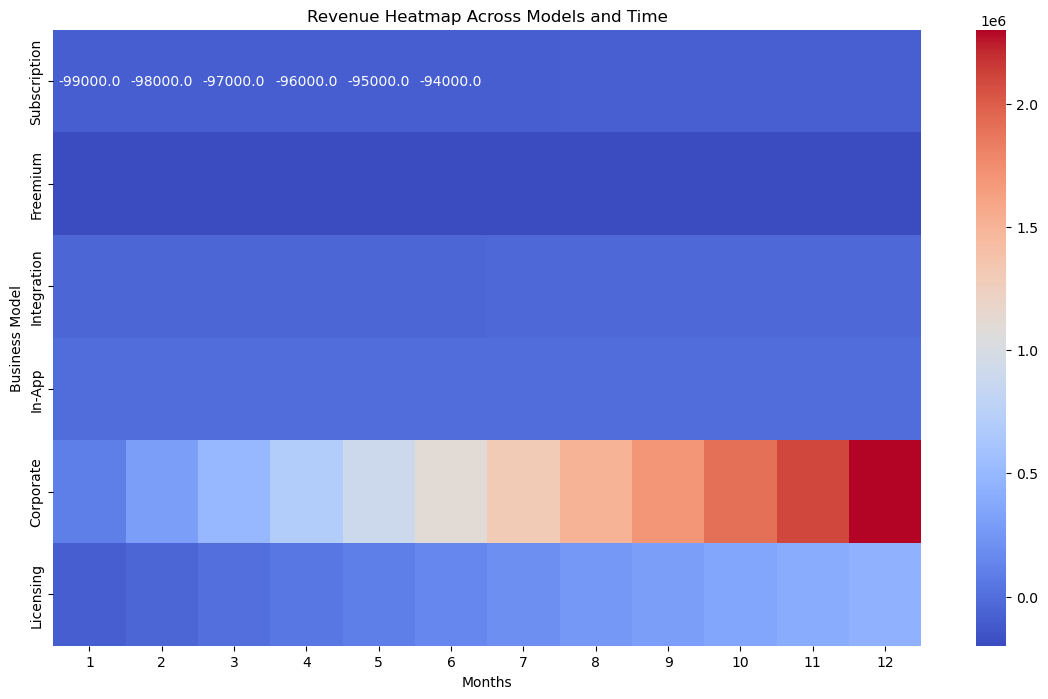

In [21]:
import seaborn as sns

plt.figure(figsize=(14, 8))
revenue_matrix = np.array([y_subscription, y_freemium, y_integration, y_in_app, y_corporate, y_licensing])
sns.heatmap(revenue_matrix, annot=True, fmt=".1f", cmap="coolwarm", yticklabels=models, xticklabels=months)
plt.title('Revenue Heatmap Across Models and Time')
plt.xlabel('Months')
plt.ylabel('Business Model')
plt.show()


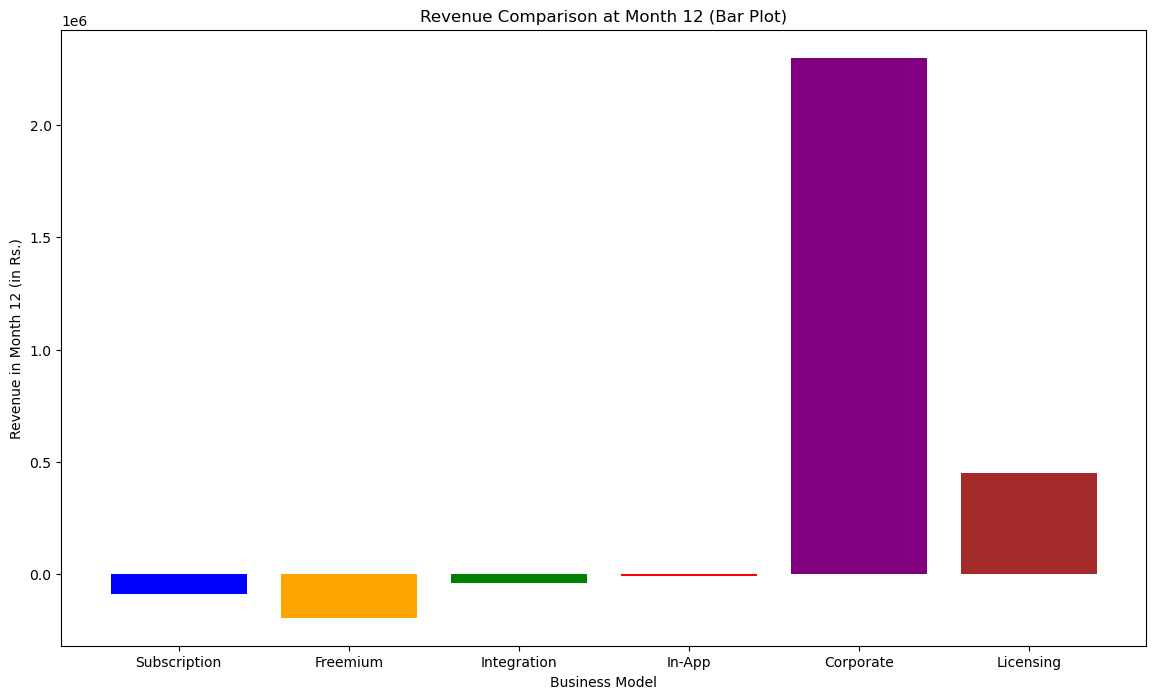

In [14]:
plt.figure(figsize=(14, 8))
models = ['Subscription', 'Freemium', 'Integration', 'In-App', 'Corporate', 'Licensing']
revenues = [y_subscription[-1], y_freemium[-1], y_integration[-1], y_in_app[-1], y_corporate[-1], y_licensing[-1]]
plt.bar(models, revenues, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Revenue Comparison at Month 12 (Bar Plot)')
plt.xlabel('Business Model')
plt.ylabel('Revenue in Month 12 (in Rs.)')
plt.show()


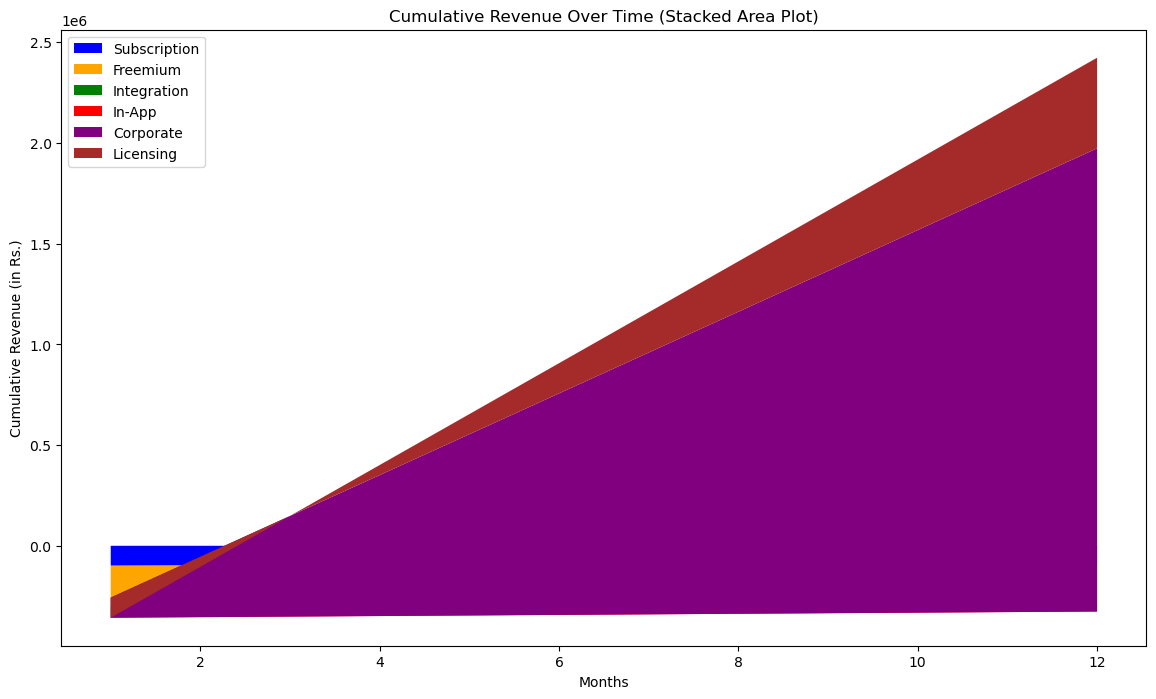

In [15]:
plt.figure(figsize=(14, 8))
plt.stackplot(months, y_subscription, y_freemium, y_integration, y_in_app, y_corporate, y_licensing,
              labels=['Subscription', 'Freemium', 'Integration', 'In-App', 'Corporate', 'Licensing'],
              colors=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('Cumulative Revenue Over Time (Stacked Area Plot)')
plt.xlabel('Months')
plt.ylabel('Cumulative Revenue (in Rs.)')
plt.legend(loc='upper left')
plt.show()


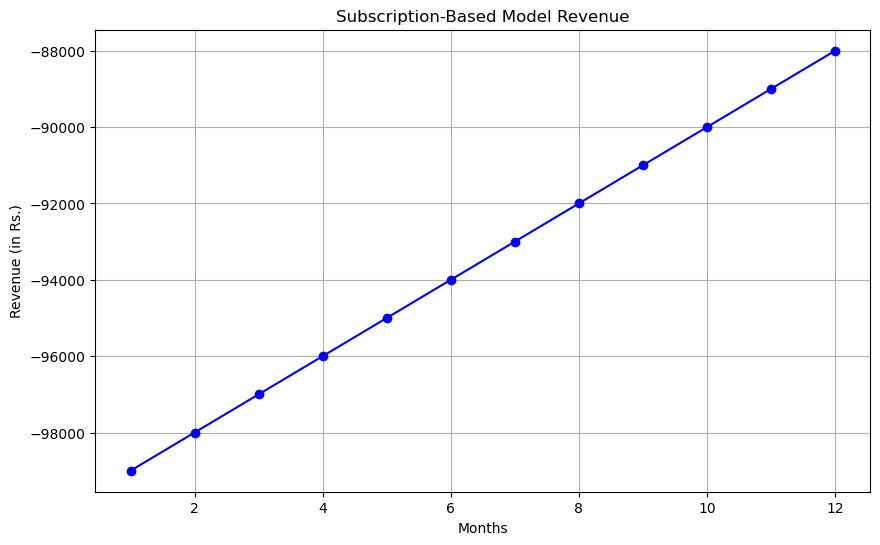

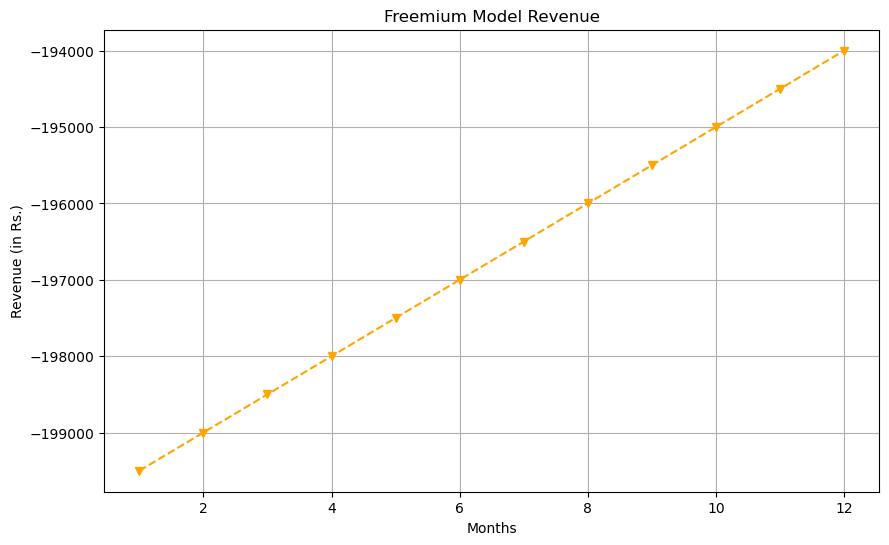

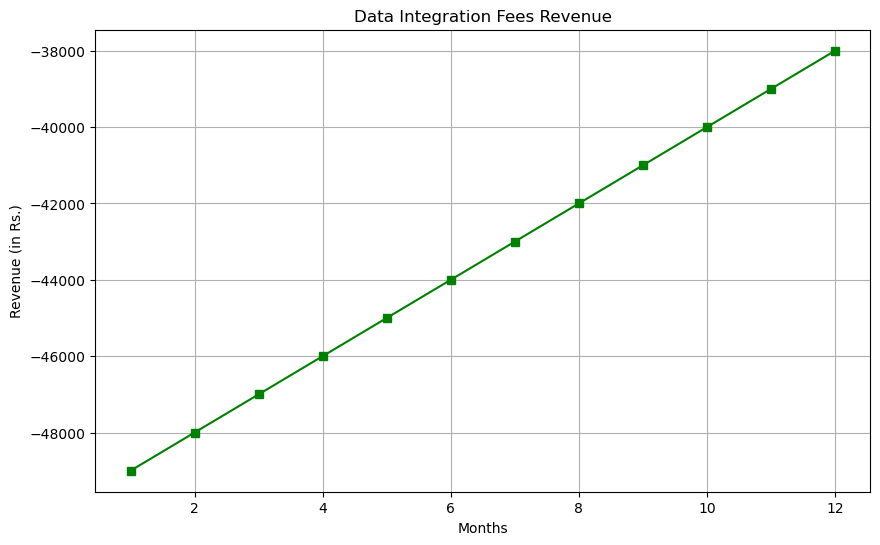

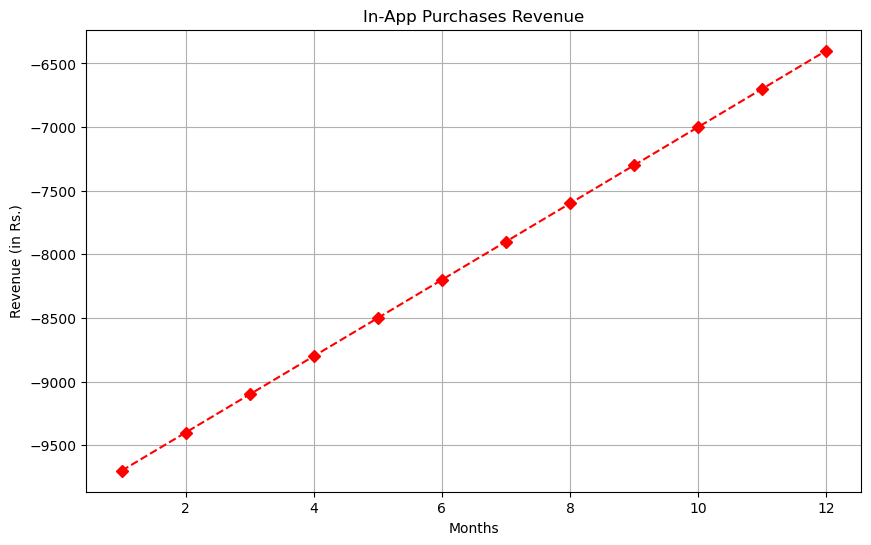

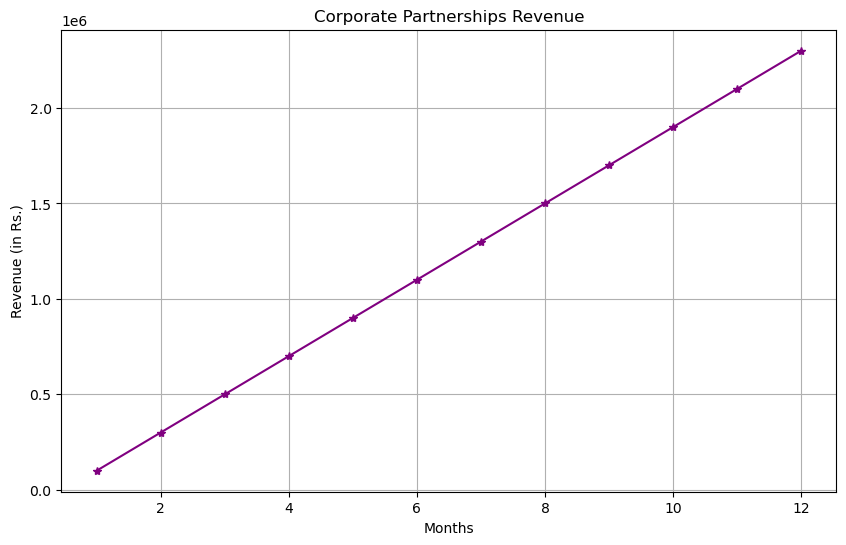

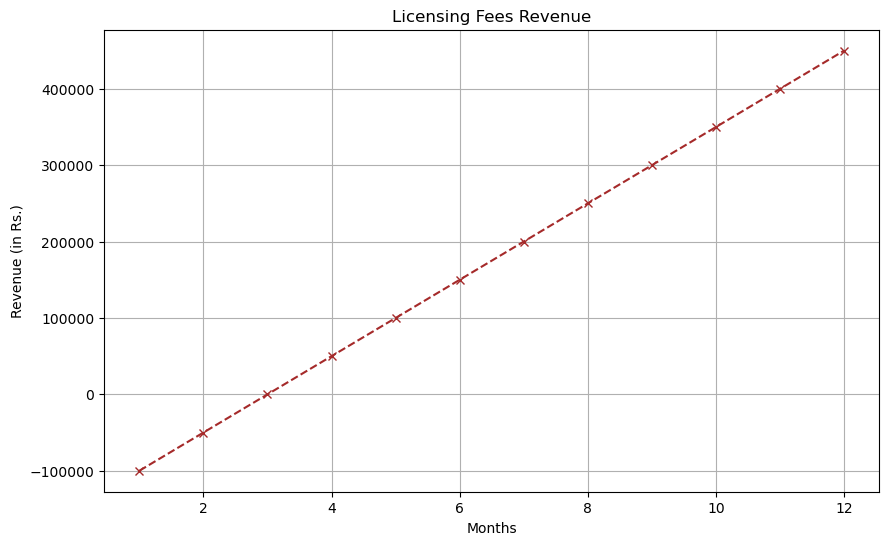

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for each model
m_subscription = 1000
c_subscription = 100000

p_freemium = 500
c_freemium = 200000

d_integration = 1000
c_integration = 50000

pi_in_app = 300
c_in_app = 10000

f_corporate = 200000
c_corporate = 100000

l_licensing = 50000
c_licensing = 150000

# Define a range for x(t) - let's assume x(t) represents time in months
months = np.arange(1, 13)

# Calculate revenue for each model
y_subscription = m_subscription * months - c_subscription
y_freemium = p_freemium * months - c_freemium
y_integration = d_integration * months - c_integration
y_in_app = pi_in_app * months - c_in_app
y_corporate = f_corporate * months - c_corporate
y_licensing = l_licensing * months - c_licensing

# Plot 1: Subscription-Based Model
plt.figure(figsize=(10, 6))
plt.plot(months, y_subscription, color='blue', linestyle='-', marker='o')
plt.title('Subscription-Based Model Revenue')
plt.xlabel('Months')
plt.ylabel('Revenue (in Rs.)')
plt.grid(True)
plt.show()

# Plot 2: Freemium Model
plt.figure(figsize=(10, 6))
plt.plot(months, y_freemium, color='orange', linestyle='--', marker='v')
plt.title('Freemium Model Revenue')
plt.xlabel('Months')
plt.ylabel('Revenue (in Rs.)')
plt.grid(True)
plt.show()

# Plot 3: Data Integration Fees
plt.figure(figsize=(10, 6))
plt.plot(months, y_integration, color='green', linestyle='-', marker='s')
plt.title('Data Integration Fees Revenue')
plt.xlabel('Months')
plt.ylabel('Revenue (in Rs.)')
plt.grid(True)
plt.show()

# Plot 4: In-App Purchases
plt.figure(figsize=(10, 6))
plt.plot(months, y_in_app, color='red', linestyle='--', marker='D')
plt.title('In-App Purchases Revenue')
plt.xlabel('Months')
plt.ylabel('Revenue (in Rs.)')
plt.grid(True)
plt.show()

# Plot 5: Corporate Partnerships
plt.figure(figsize=(10, 6))
plt.plot(months, y_corporate, color='purple', linestyle='-', marker='*')
plt.title('Corporate Partnerships Revenue')
plt.xlabel('Months')
plt.ylabel('Revenue (in Rs.)')
plt.grid(True)
plt.show()

# Plot 6: Licensing Fees
plt.figure(figsize=(10, 6))
plt.plot(months, y_licensing, color='brown', linestyle='--', marker='x')
plt.title('Licensing Fees Revenue')
plt.xlabel('Months')
plt.ylabel('Revenue (in Rs.)')
plt.grid(True)
plt.show()
